# Imports e dependências

In [401]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

import pickle

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

from sklearn import tree

# Carregamento de dados e formatação para uso

### Obter dados do arquivo

In [402]:
dados = pd.read_csv('Dados/restaurante.csv', sep=';')

In [403]:
dados

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim
3,Sim,Nao,Sim,Sim,Cheio,R,Sim,Nao,Tailandes,10-30,Sim
4,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60,Nao
5,Nao,Sim,Nao,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Nao,Sim,Nao,Nao,Nenhum,R,Sim,Nao,Hamburger,0-10,Nao
7,Nao,Nao,Nao,Sim,Alguns,RR,Sim,Sim,Tailandes,0-10,Sim
8,Nao,Sim,Sim,Nao,Cheio,R,Sim,Nao,Hamburger,>60,Nao
9,Sim,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Italiano,10-30,Nao


### Codifica os atributos de valor binário e multivalorados ordinais em numérico

In [404]:
cols_label_encode = ['Alternativo', 'Bar', 'SexSab','fome', 'Preco', 'Chuva', 'Res','Tempo']
dados[cols_label_encode] = dados[cols_label_encode].apply(LabelEncoder().fit_transform)

##### Codificação da coluna 'Cliente'

In [405]:
for i in range(len(dados)):
    if   dados['Cliente'][i] == "Nenhum":
        dados.loc[i, 'Cliente'] = 0
    elif dados['Cliente'][i] == "Alguns":
        dados.loc[i, 'Cliente'] = 1
    elif dados['Cliente'][i] == "Cheio":
        dados.loc[i, 'Cliente'] = 2

### Codificação do atributo multivalorado não-ordinal em numérico

##### Codificação da coluna 'Tipo'

In [406]:
cols_onehot_encode = ['Tipo']
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)
# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(dados[cols_onehot_encode])
# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)
# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_das_colunas)
# Combinar as colunas codificadas com as colunas que não foram transformadas
dados= pd.concat([df_onehot, dados.drop(columns=cols_onehot_encode)], axis=1)

### Dados totalmente codificados

In [407]:
dados

,Tipo_Frances,Tipo_Hamburger,Tipo_Italiano,Tipo_Tailandes,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tempo,Conclusao
0,1.0,0.0,0.0,0.0,1,0,0,1,1,2,0,1,0,Sim
1,0.0,0.0,0.0,1.0,1,0,0,1,2,0,0,0,2,Nao
2,0.0,1.0,0.0,0.0,0,1,0,0,1,0,0,0,0,Sim
3,0.0,0.0,0.0,1.0,1,0,1,1,2,0,1,0,1,Sim
4,1.0,0.0,0.0,0.0,1,0,1,0,2,2,0,1,3,Nao
5,0.0,0.0,1.0,0.0,0,1,0,1,1,1,1,1,0,Sim
6,0.0,1.0,0.0,0.0,0,1,0,0,0,0,1,0,0,Nao
7,0.0,0.0,0.0,1.0,0,0,0,1,1,1,1,1,0,Sim
8,0.0,1.0,0.0,0.0,0,1,1,0,2,0,1,0,3,Nao
9,0.0,0.0,1.0,0.0,1,1,1,1,2,2,0,1,1,Nao


### Separação de dados para treino e teste

In [408]:
# Separação de dados de atributo da conclusão desses
x_prev= dados.iloc[:, :-1]
y_classe = dados.iloc[:, [-1]]

# Separar dados em treino e teste
# (parte é usada para treinar a árvore, os demais servem para testes futuros do modelo)
x_treino, x_teste, y_treino, y_teste = train_test_split(x_prev, y_classe, test_size = 0.20, random_state = 42)

### Salvar dados formatados em novo arquivo

In [409]:
with open('Dados/Restaurante.pkl', mode = 'wb') as f:
    pickle.dump([x_treino, x_teste, y_treino, y_teste], f)

#  Criar árvore com base de dados

In [410]:

# Abrir dados formatados de arquivo e transferir para variáveis
with open('Dados/restaurante.pkl', 'rb') as f:
    x_treino, x_teste, y_treino, y_teste = pickle.load(f)

# Definir critério da árvore como sendo entropia
modelo = DecisionTreeClassifier(criterion='entropy')

Y = modelo.fit(x_treino, y_treino)


# Testar modelo

### Testar árvore

In [412]:
previsoes = modelo.predict(x_teste)

### Obter acurácia do teste

In [413]:
accuracy_score(y_teste, previsoes)

0.6666666666666666

### Matriz de confusão

In [414]:
confusion_matrix(y_teste, previsoes)

array([[1, 1],
       [0, 1]])

c:\Linguagens\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,estimator,DecisionTreeC...ion='entropy')
,ax,<Axes: >
,sample_weight,None
,percent,False
,classes,None
,encoder,None
,cmap,<matplotlib.c...002C4CBF0D910>
,fontsize,None
,is_fitted,'auto'
,force_model,False
,criterion,'entropy'


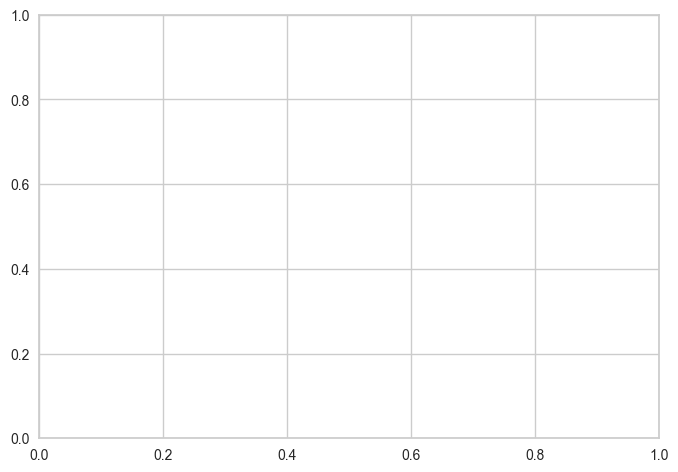

In [415]:
cm = ConfusionMatrix(modelo)
cm.fit(x_treino, y_treino)

In [416]:
cm.score(x_teste, y_teste)

0.6666666666666666

In [417]:

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       1.00      0.50      0.67         2
         Sim       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



# Resultado

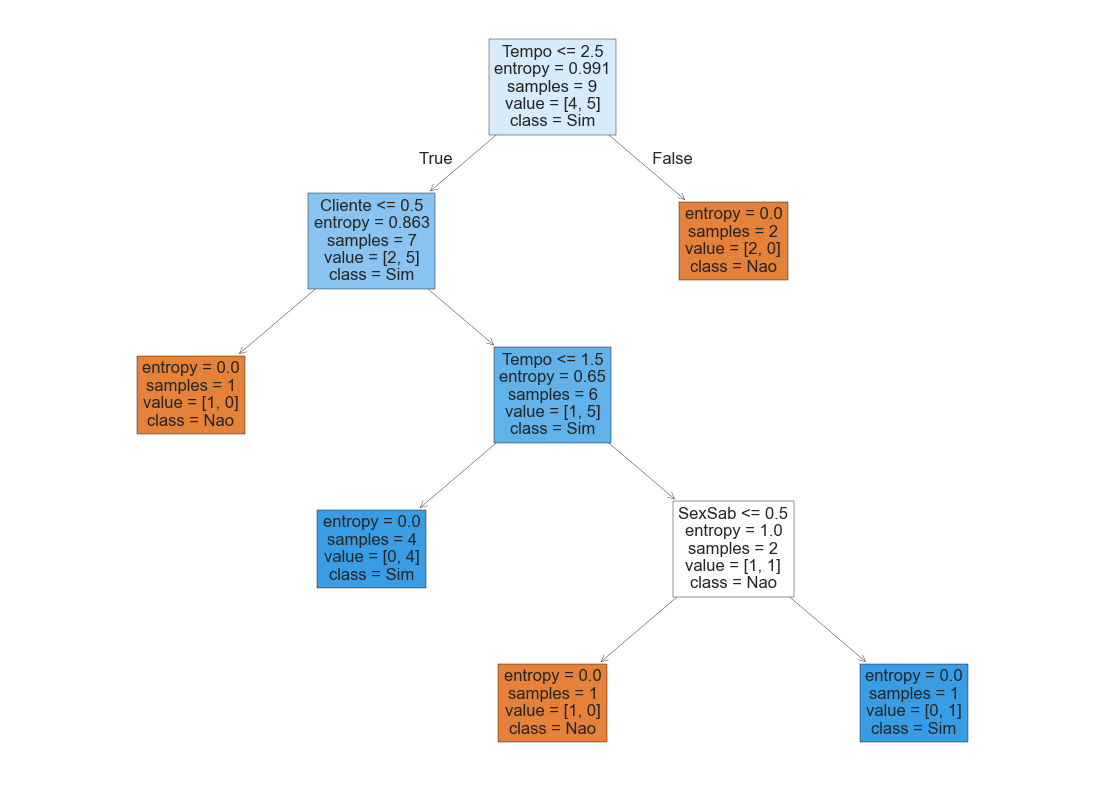

In [418]:
previsores = x_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(14,10))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True, fontsize=12);